In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import *
from matplotlib import pyplot as plt

# Dataset loading
import sys
sys.path.append("..")
from Functions.UNSW_DF import *

X_train, X_test, y_train, y_test = DF_XY()

( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [2]:
error = []
accuracy = []
f1 = []
recall = []
precision =[]

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Appending Scores to list
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))
    f1.append(f1_score(y_test, pred_i))
    recall.append(recall_score(y_test, pred_i))
    precision.append(precision_score(y_test, pred_i))
    
# 457m 18.6s to run 1-100    

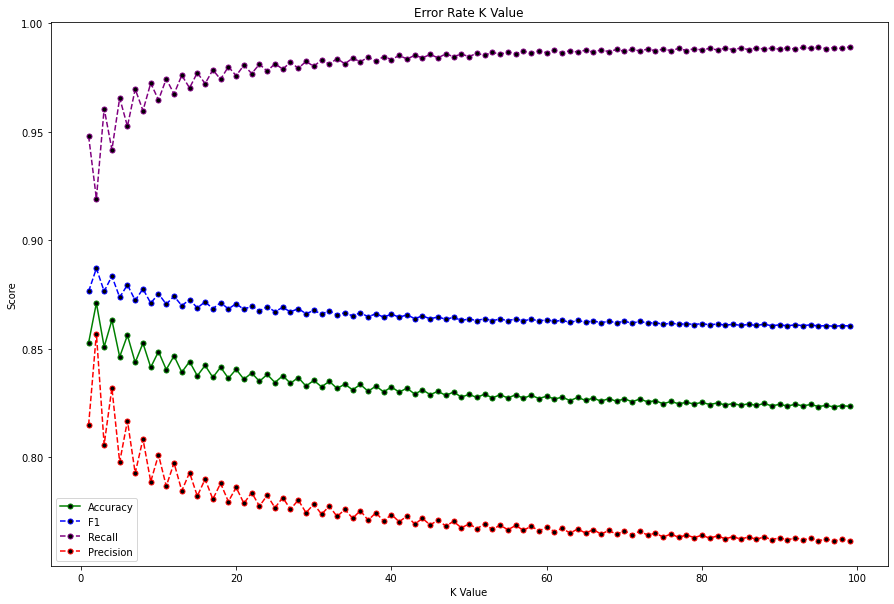

In [38]:
rangeEnd = 100
plt.figure(figsize=(15, 10))
markercolor = "black"

plt.plot(range(1, rangeEnd), accuracy, color='green', marker='o',
         markerfacecolor=markercolor, markersize=5)

plt.plot(range(1, rangeEnd), f1, color='blue', linestyle='dashed', marker='o',
         markerfacecolor=markercolor, markersize=5)

plt.plot(range(1, rangeEnd), recall, color='purple', linestyle='dashed', marker='o',
         markerfacecolor=markercolor, markersize=5)

plt.plot(range(1, rangeEnd), precision, color='red', linestyle='dashed', marker='o',
         markerfacecolor=markercolor, markersize=5)

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Score')

# Function add a legend  
plt.legend(["Accuracy", "F1", "Recall", "Precision"])

#plt.savefig("KNN_Scores(1-100)_2.png", dpi=300)